In [74]:
import numpy as np
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats as st
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# OLS (Ordinary Least Squares) - метод наименьших квадратов
# R-squared – коэффициент детерминации


In [43]:
# X1 transaction date – Дата транзакции X1
# X2 house age – X2 возраст дома
# X3 distance to the nearest MRT station – X3 расстояние до ближайшей станции метро
# X4 number of convenience stores – X4 количество магазинов шаговой доступности
# X5 latitude – X5 широта
# X6 longitude – X6 долгота
# Y house price of unit area – Y цена дома за единицу площади

df = pd.read_csv('RealEstate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [44]:
# Получение значений основных показателей описательной статистики
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


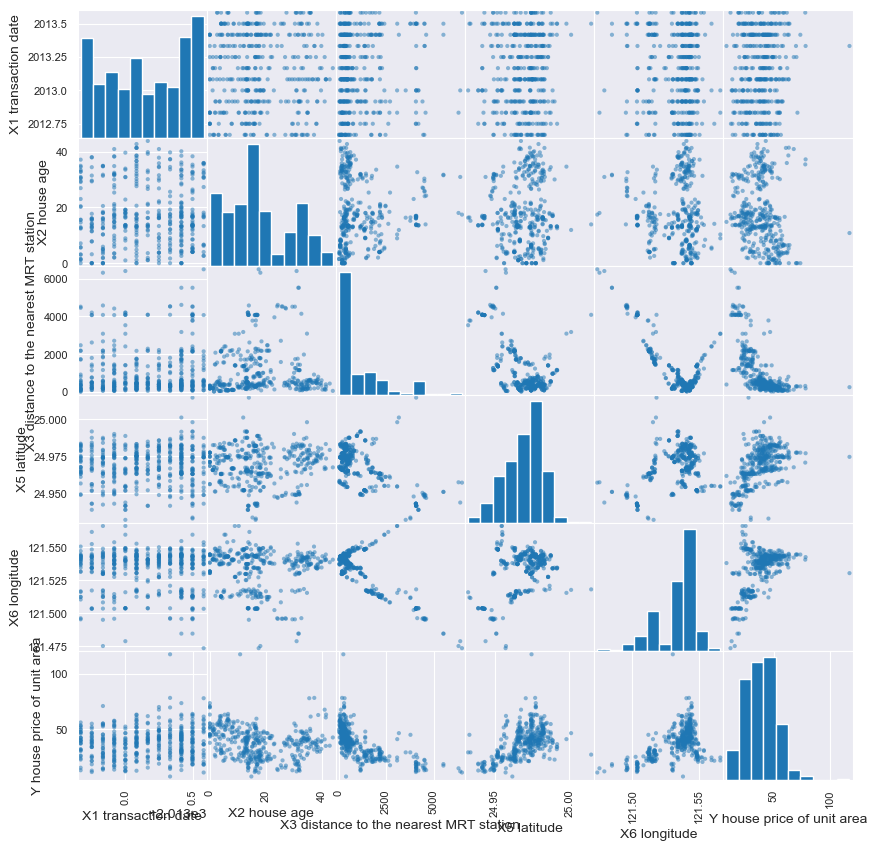

In [45]:
# Построение диаграмм рассеяния для признаков, измеренных в количественной шкале
pd.plotting.scatter_matrix(df.select_dtypes(include=[float]), figsize=(10, 10))
plt.show()

In [46]:
# Построение корреляционной матрицы
corr_matrix = df.corr()
corr_matrix

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


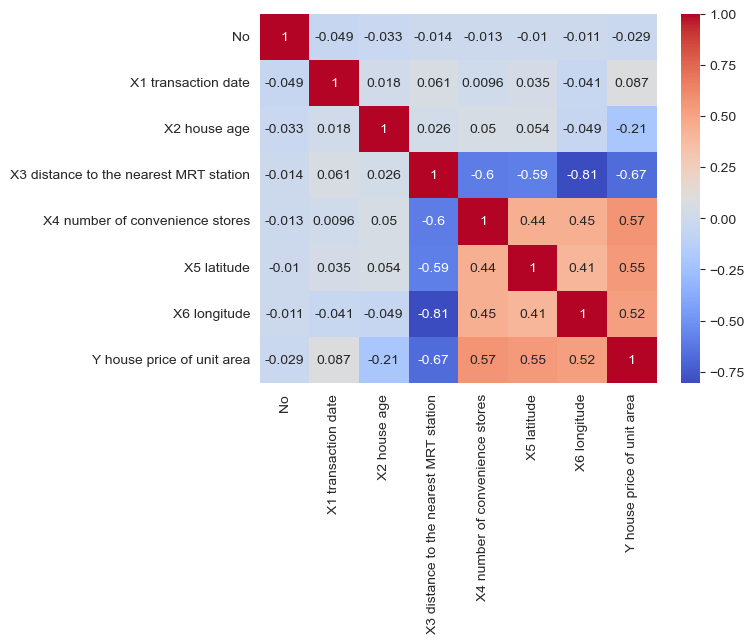

In [47]:

# Построение тепловой карты
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [48]:
# Проверим гипотезы о значимости коэффициентов корреляции:

for (columnName, columnData) in df.iteritems():
    for (columnName2, columnData2) in df.iteritems():
        # if df[columnName] == df[columnName2]: continue
        print(st.pearsonr(df[columnName], df[columnName2]))

PearsonRResult(statistic=1.0, pvalue=0.0)
PearsonRResult(statistic=-0.04865794891221829, pvalue=0.3233316942662835)
PearsonRResult(statistic=-0.03280811354999452, pvalue=0.5055982439538952)
PearsonRResult(statistic=-0.013573491173687627, pvalue=0.7830417171329246)
PearsonRResult(statistic=-0.01269894574004366, pvalue=0.7967044574914429)
PearsonRResult(statistic=-0.010109664321667202, pvalue=0.8375060778530721)
PearsonRResult(statistic=-0.011059275732135259, pvalue=0.8224853851851525)
PearsonRResult(statistic=-0.028587169149794027, pvalue=0.5618992934861172)
PearsonRResult(statistic=-0.04865794891221829, pvalue=0.3233316942662835)
PearsonRResult(statistic=1.0, pvalue=0.0)
PearsonRResult(statistic=0.017548767356174284, pvalue=0.7218312671825516)
PearsonRResult(statistic=0.06087995314209769, pvalue=0.2164119785692712)
PearsonRResult(statistic=0.00963544458654365, pvalue=0.8450296690137314)
PearsonRResult(statistic=0.035057756205304574, pvalue=0.47684769019550793)
PearsonRResult(statistic=

In [49]:
# Допустим, мы хотим проверить гипотезу о том,
# что коэффициент корреляции между ценой недвижимости ("X5 latitude") и общей площадью ("X6 longitude") является значимым.
# Тогда процедура проверки может выглядеть следующим образом:

# Вычисление коэффициента корреляции
corr_coef = np.corrcoef(df['X5 latitude'], df['X6 longitude'])[0, 1]

# Вычисление числа степеней свободы
n = len(df)
df_ = n - 2

# Вычисление t-статистики
t_stat = corr_coef * ((n - 2) / (1 - corr_coef**2))**0.5

# Вычисление p-значения
p_value = t.sf(abs(t_stat), df=df_) * 2

# Вывод результатов
print(f"Коэффициент корреляции: {corr_coef:.4f}")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-значение: {p_value:.4f}")
print("Гипотеза о значимости коэффициента корреляции " + ("отвергается" if p_value < 0.05 else "не отвергается"))

# PearsonRResult(statistic=0.41292394475946737, pvalue=1.7738016967615086e-18)

Коэффициент корреляции: 0.4129
t-статистика: 9.2026
p-значение: 0.0000
Гипотеза о значимости коэффициента корреляции отвергается


 
0.5106 x + 108.8
0.0001949037551964766


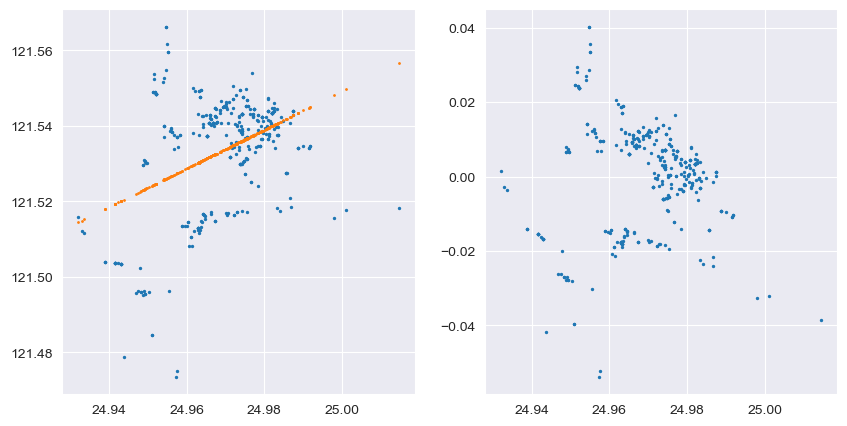

In [50]:
pole1='X5 latitude'
pole2='X6 longitude'
plt.figure(figsize=(10, 5))
plt.subplot (1, 2, 1)
z=np.polyfit(df[pole1], df[pole2],deg=1)
f = np.poly1d(z)
plt.scatter(df[pole1], df[pole2],s=2)
plt.scatter(df[pole1],f(df[pole1]),s=1)
print(f)
residuals = df[pole2]-f(df[pole1])
plt.subplot (1, 2, 2)
plt.scatter(df[pole1],residuals,s=2)
print(np.var(residuals))


In [51]:
X = df['X5 latitude']
y = df['X6 longitude']
reg = LinearRegression().fit(X.values.reshape(-1,1), y)
print(f'Уравнение линейной регрессии: y = {reg.intercept_:.2f} + {reg.coef_[0]:.2f} * X')

Уравнение линейной регрессии: y = 108.78 + 0.51 * X


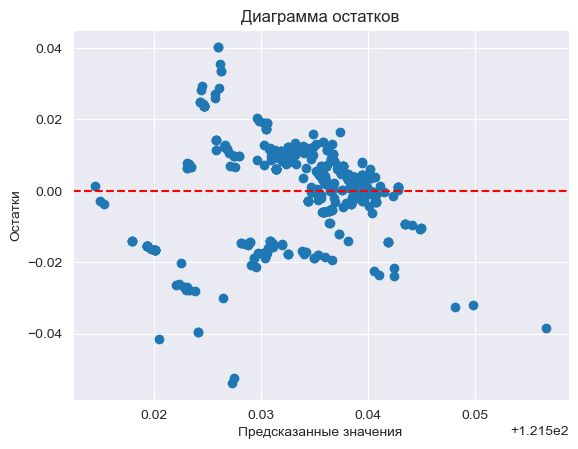

In [52]:
# Построим диаграмму остатков
y_pred = reg.predict(X.values.reshape(-1,1))
residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.title('Диаграмма остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [53]:
# Диаграмма остатков должна иметь равномерное распределение вокруг горизонтальной линии y=0,
# что указывает на то, что остатки распределены случайно и нет систематической ошибки.
# Оценим дисперсию остатков:

print(f'Дисперсия остатков: {residuals.var()}')

# Дисперсия остатков показывает, насколько разбросаны остатки вокруг среднего значения.

Дисперсия остатков: 0.00019537567712187104


          5        4         3         2
-0.02279 x + 0.79 x + 11.37 x - 278.2 x - 1.226e+04 x + 2.169e+05
0.00017583034542314948


/Users/malinatrash/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


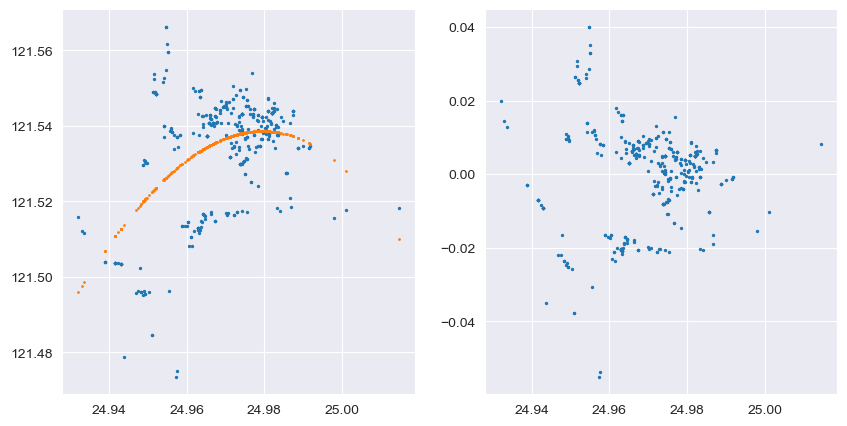

In [54]:
plt.figure(figsize=(10, 5))
plt.subplot (1, 2, 1)
z=np.polyfit(df[pole1], df[pole2],deg=5)
f = np.poly1d(z)
plt.scatter(df[pole1], df[pole2],s=2)
plt.scatter(df[pole1],f(df[pole1]),s=1)
print(f)
residuals = df[pole2]-f(df[pole1])
plt.subplot (1, 2, 2)
plt.scatter(df[pole1],residuals,s=2)
print(np.var(residuals))


In [55]:
from sklearn.preprocessing import PolynomialFeatures

# Построим уравнение полиномиальной регрессии для зависимой переменной "X5 latitude" от независимой переменной "X6 longitude":

X = df['X5 latitude']
y = df['X6 longitude']
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X.values.reshape(-1,1))
reg = LinearRegression().fit(X_poly, y)
print(f'Уравнение полиномиальной регрессии: y = {reg.intercept_:.2f} + {reg.coef_[1]:.2f} * X + {reg.coef_[2]:.2f} * X^2')

Уравнение полиномиальной регрессии: y = -12208.79 + 987.25 * X + -19.76 * X^2


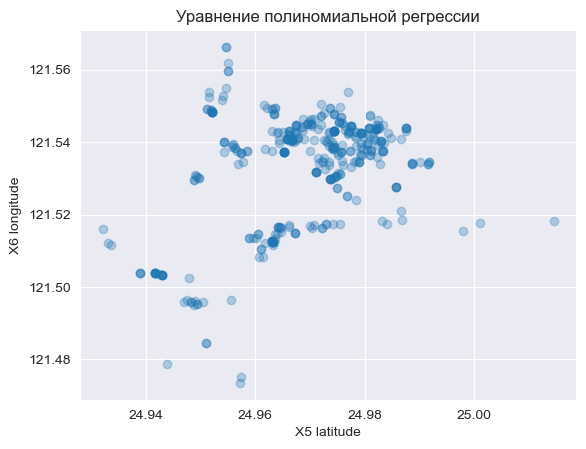

In [56]:
# Построим график уравнения полиномиальной регрессии:

X_range = np.arange(X.min(), X.max(), 0.1).reshape(-1,1)
X_range_poly = poly.fit_transform(X_range)
y_pred = reg.predict(X_range_poly)

plt.scatter(X, y, alpha=0.3)
plt.plot(X_range, y_pred, color='r')
plt.xlabel('X5 latitude')
plt.ylabel('X6 longitude')
plt.title('Уравнение полиномиальной регрессии')
plt.show()

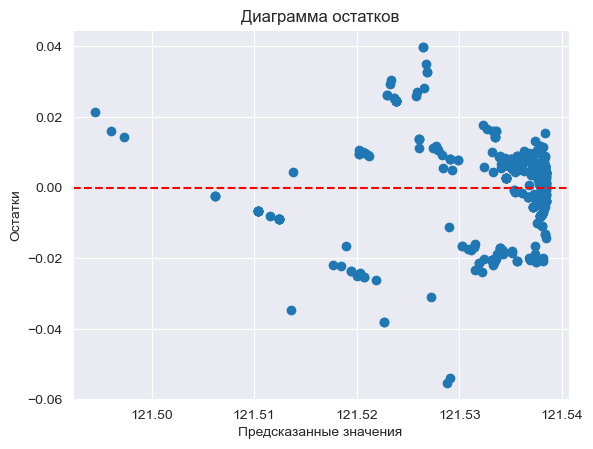

In [57]:
# Построим диаграмму остатков:

y_pred = reg.predict(X_poly)
residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.title('Диаграмма остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [58]:
# Оценим дисперсию остатков:

print(f'Дисперсия остатков: {residuals.var()}')

Дисперсия остатков: 0.00017633653134268806


In [59]:
# Индекс корреляции (Rxy) – достоверный показатель интенсивности связи = 0…1.
# Коэффициент корреляции (Correlation Coefficient) — это мера линейной зависимости между двумя переменными

# расчет коэффициента корреляции Пирсона
corr_coef = np.corrcoef(X, y)[0, 1]
print('Коэффициент корреляции Пирсона:', corr_coef)

Коэффициент корреляции Пирсона: 0.41292394475946764


In [62]:
# расчет индекса корреляции
def getCorIndex(x, y, deg):
    z = np.polyfit(x,y,deg)
    f = np.poly1d(z)
    yk = f(df[pole1])
    yb = df[pole2]
    return ((len(yk) * np.sum(yk**2) - sum(yb)**2) / (len(yb) * np.sum(yb**2) - sum(yb)**2)) ** .5
print('Индекс корреляции при полиноме:')
for i in range(1,6):
    print(i, " порядка: ", getCorIndex(df[pole1], df[pole2], i))

Индекс корреляции при полиноме:
1  порядка:  0.41292375028260664
2  порядка:  0.5013324302137164
3  порядка:  0.5017234922041612
4  порядка:  0.5015433268685693
5  порядка:  0.50136940227677


/var/folders/q_/223hwj6s5yzgw6cmnmw4txbr0000gn/T/ipykernel_5852/483094070.py:10: RankWarning: Polyfit may be poorly conditioned
  print(i, " порядка: ", getCorIndex(df[pole1], df[pole2], i))
/var/folders/q_/223hwj6s5yzgw6cmnmw4txbr0000gn/T/ipykernel_5852/483094070.py:10: RankWarning: Polyfit may be poorly conditioned
  print(i, " порядка: ", getCorIndex(df[pole1], df[pole2], i))


In [63]:
# Исследуем зависимость центы дома за единицу площади от возраста дома и расстояния до ближайшей станции метро.
# Для этого построим модель множественной регрессии:

y=df['Y house price of unit area'].values
x=df[['X2 house age','X3 distance to the nearest MRT station']].values.T
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0],x[1], ones)))
    results = sm.OLS(y, X).fit()
    return results
print(reg_m(y, x).summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     198.3
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           5.07e-61
Time:                        23:02:59   Log-Likelihood:                -1527.9
No. Observations:                 414   AIC:                             3062.
Df Residuals:                     411   BIC:                             3074.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2310      0.042     -5.496      0.0

In [73]:
import numpy as np
data1 = df['X5 latitude']
dff = pd.DataFrame(columns=['x','y'])
dff['x'] = df['X5 latitude']
dff['y'] = df['X6 longitude']
#
x = np.column_stack((data1**1, data1**2, data1**3))
res = sm.formula.ols(formula='y~X', data=dff).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     84.69
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           1.77e-18
Time:                        23:10:07   Log-Likelihood:                 1181.0
No. Observations:                 414   AIC:                            -2358.
Df Residuals:                     412   BIC:                            -2350.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    108.7830      1.386     78.515      0.0